<a href="https://colab.research.google.com/github/mikislin/CNE25/blob/main/notebooks/CNE_Class2_Stats_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions: How to Complete and Submit Class 2 Exercise

1. Save a Copy to Your Google Drive

Go to File → Save a copy in Drive - This creates your personal editable version.

2. Complete the Assignment

Write your code in the cells labeled #solution. Write your written answers or explanations in the text (Markdown) cells.

3. Save Your Work

Your edits are automatically saved to your Drive, but double-check before submitting.

4. Share Your Notebook

When you’re finished, click Share (top-right corner). Set sharing to “Anyone with the link can view.” DM your notebook link to me on Slack

In [1]:
%pip install scikit-posthocs

In [2]:
# @title import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scikit_posthocs as sp
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Problem 1:  Standard Deviation (SD) vs. Standard Error of the Mean (SEM) - Conceptual Interpretation



Use the interactive "Standard Deviation (SD) vs. Standard Error of the Mean (SEM)" simulation in [class notebook](https://colab.research.google.com/github/mikislin/CNE25/blob/main/CNE_Class2_Stats.ipynb)

Instructions:

1. Run the Simulation: Execute the code block containing the "SD vs. Standard Error of the Mean (SEM)" simulation.

2. Manipulate Parameters:
  Interact with the simulation by performing the following actions:

    Set the Sample Size (n) to a small value (e.g., 10). Click the "Draw 100 Samples" button multiple times.

    Now, set the Sample Size (n) to a large value (e.g., 500). Click the "Draw 100 Samples" button multiple times.

    Click the "Reset Simulation" button.

**(a)**  Imagine (Simulate) the "Population" represents the firing rate of a specific neuron in response to a stimulus, recorded over thousands of trials (mean rate = 20Hz). The "Population SD" is 7.2 and reflects the biological variability of this neuron's response. You are conducting an experiment where you can only record 20 trials (n=20).

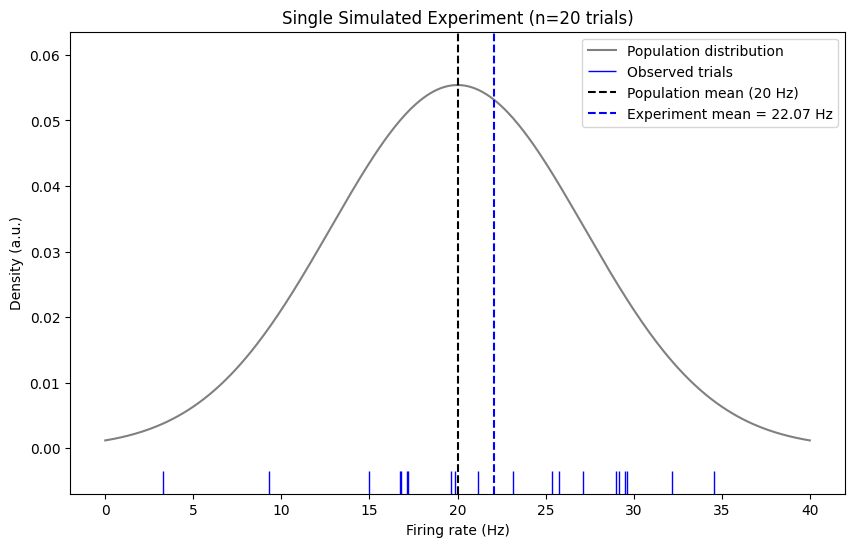

Trial firing rates (Hz): [21.16 34.58  9.27 19.84 25.75 19.66 16.77 25.34 29.49 32.2   3.29 16.76
 29.17 17.15 29.   14.98 23.16 17.17 27.13 29.63]
Mean firing rate across 20 trials: 22.07 Hz
Expected SE of the mean: 1.610 Hz


In [ ]:
# solution

# Parameters
population_mean = 20      # Hz
population_sd = 7.2       # Hz
n_trials = 20             # number of trials

# Simulate one experiment: 20 trial firing rates
trial_rates = np.random.normal(population_mean, population_sd, size=n_trials)
experiment_mean = np.mean(trial_rates)
expected_se = population_sd / np.sqrt(n_trials)

# Plot population distribution (as reference)
x = np.linspace(0, 40, 400)
population_pdf = (1 / (population_sd * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - population_mean)/population_sd)**2)

plt.figure(figsize=(10, 6))

# Plot population distribution
plt.plot(x, population_pdf, color='gray', label='Population distribution')

# Plot individual trial firing rates
sns.rugplot(trial_rates, height=0.05, color='blue', label='Observed trials')

# Add vertical lines for population mean and experiment mean
plt.axvline(population_mean, color='black', linestyle='--', label='Population mean (20 Hz)')
plt.axvline(experiment_mean, color='blue', linestyle='--', label=f'Experiment mean = {experiment_mean:.2f} Hz')

plt.title(f"Single Simulated Experiment (n={n_trials} trials)")
plt.xlabel("Firing rate (Hz)")
plt.ylabel("Density (a.u.)")
plt.legend()
plt.show()

print(f"Trial firing rates (Hz): {np.round(trial_rates, 2)}")
print(f"Mean firing rate across {n_trials} trials: {experiment_mean:.2f} Hz")
print(f"Expected SE of the mean: {expected_se:.3f} Hz")


If you report the **mean firing rate ± SD**, what are you communicating about the neuron's behavior?


reply here:

If you instead report the **mean firing rate ± SEM**, what are you communicating about the precision of your estimate of the mean?


reply here:

A colleague reviews your paper and says -

> You should report SEM because the error bars are smaller for 20 recorded trials before and after treatment, which makes the figure look better.

Based on the simulation, provide a principled argument when it is appropriate to use SD versus SEM on a graph for group comparison.


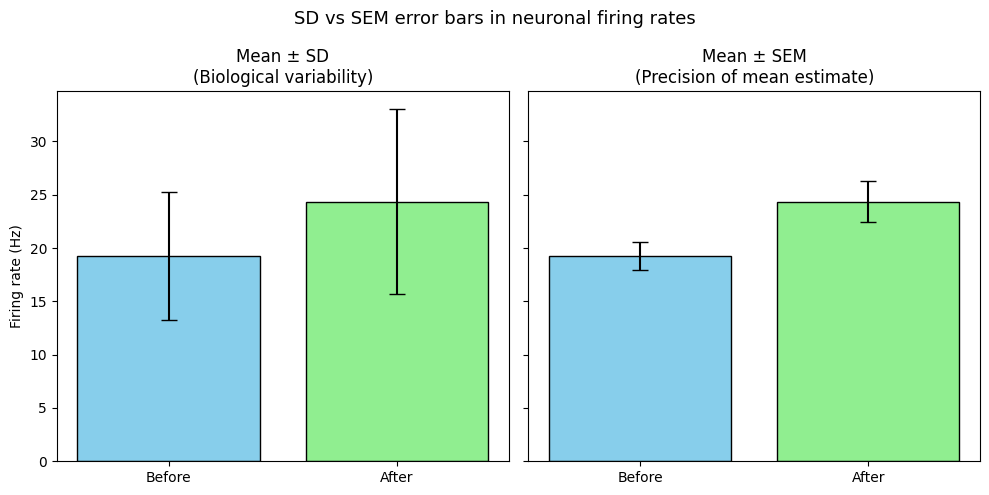

Condition	Mean (Hz)	SD (Hz)	SEM (Hz)
Before		19.25		5.99		1.34
After		24.36		8.71		1.95


In [ ]:
# solution
mean_rate = 20 #Hz
pop_sd = 7.2 #Hz
#parameters: 20 trials, SD 7.2
#let's imagine that the population mean increases after the treatment
mean_rate_after = 24
#simulate data
before = np.random.normal(mean_rate, pop_sd, n_trials)
after = np.random.normal(mean_rate_after, pop_sd, n_trials)
#summary stats
means =[np.mean(before), np.mean(after)]
sds = [np.std(before, ddof=1), np.std(after, ddof=1)]
sems=[sd/np.sqrt(n_trials) for sd in sds]
#plot
x = np.arange(2)
fig, ax = plt.subplots(1,2,figsize=(10,5), sharey=True)

# Mean ± SD
ax[0].bar(x, means, yerr=sds, color=['skyblue','lightgreen'], capsize=6, edgecolor='black')
ax[0].set_xticks(x)
ax[0].set_xticklabels(['Before', 'After'])
ax[0].set_title("Mean ± SD\n(Biological variability)")
ax[0].set_ylabel("Firing rate (Hz)")

# Mean ± SEM
ax[1].bar(x, means, yerr=sems, color=['skyblue','lightgreen'], capsize=6, edgecolor='black')
ax[1].set_xticks(x)
ax[1].set_xticklabels(['Before', 'After'])
ax[1].set_title("Mean ± SEM\n(Precision of mean estimate)")

plt.suptitle("SD vs SEM error bars in neuronal firing rates", fontsize=13)
plt.tight_layout()
plt.show()

#numerical results
print("Condition\tMean (Hz)\tSD (Hz)\tSEM (Hz)")
for name, m, sd, sem in zip(["Before","After"], means, sds, sems):
    print(f"{name}\t\t{m:.2f}\t\t{sd:.2f}\t\t{sem:.2f}")


# Problem 2:  Automating Statistical Decisions and Critical Analysis

Instructions:

  **(a)**. Review the compare_groups function: Analyze its logic.


```


```



In [ ]:
def compare_groups(df, metric_col, group_col='Group'):
    groups = df[group_col].unique()
    if len(groups) != 2:
        raise ValueError("This function is designed for two-group comparison.")

    # Ensure consistent group order for reporting
    group1_name = "WT" if "WT" in groups else groups[0]
    group2_name = "KO" if "KO" in groups else groups[1]

    group1_data = df[df[group_col] == group1_name][metric_col].dropna()
    group2_data = df[df[group_col] == group2_name][metric_col].dropna()

    if len(group1_data) < 3 or len(group2_data) < 3:
        # Shapiro test requires at least 3 samples
        is_normal = False
        norm1_p, norm2_p = np.nan, np.nan
    else:
        _, norm1_p = stats.shapiro(group1_data) #checks for normality (Shapiro-Wilk test)
        _, norm2_p = stats.shapiro(group2_data)
        is_normal = norm1_p > 0.05 and norm2_p > 0.05

    _, var_p = stats.levene(group1_data, group2_data) #homogeneity of variances (Levene's test)
    is_equal_variance = var_p > 0.05

    if is_normal:
        if is_equal_variance:
            test_name = "Independent T-test"
            stat, p_val = stats.ttest_ind(group1_data, group2_data, equal_var=True)
        else:
            test_name = "Welch's T-test"
            stat, p_val = stats.ttest_ind(group1_data, group2_data, equal_var=False)
    else:
        test_name = "Mann-Whitney U"
        # The smaller of the two U values is typically reported
        stat, p_val = stats.mannwhitneyu(group1_data, group2_data, alternative='two-sided')

    return {
        'Metric': metric_col,
        'Test Used': test_name,
        'Statistic': f"{stat:.3f}",
        'P-value': f"{p_val:.4f}",
        'Significant': p_val < 0.05,
        f'Mean_{group1_name}': f"{group1_data.mean():.2f}",
        f'Median_{group1_name}': f"{group1_data.median():.2f}", # ADDED
        f'Std_{group1_name}': f"{group1_data.std():.2f}",
        f'N_{group1_name}': len(group1_data),
        f'Mean_{group2_name}': f"{group2_data.mean():.2f}",
        f'Median_{group2_name}': f"{group2_data.median():.2f}", # ADDED
        f'Std_{group2_name}': f"{group2_data.std():.2f}",
        f'N_{group2_name}': len(group2_data),
        'Shapiro_p (G1)': f"{norm1_p:.3f}",
        'Shapiro_p (G2)': f"{norm2_p:.3f}",
        'Levene_p': f"{var_p:.3f}",
    }

**(b)** Create and Analyze a Simulated Dataset (as pd.DataFrame)

Group: 'Control' and 'Treatment'

metric_col:

  Synaptic_Density: A normally distributed variable with different means for each group.

  Behavioral_Score: A non-normally distributed variable. Make the variance in 'Treatment' much larger than in 'Control' for this metric.

  Neuron_FRate: Data that is approximately normal.

     Group  Synaptic_Density  Behavioral_Score  Neuron_FRate
0  Control          0.982874          5.281121     13.262691
1  Control          1.399469          0.390513     20.235697
2  Control          1.256596          3.270153     21.437470
3  Control          0.898741          3.422267     17.646085
4  Control          1.084280          4.559147     20.098842


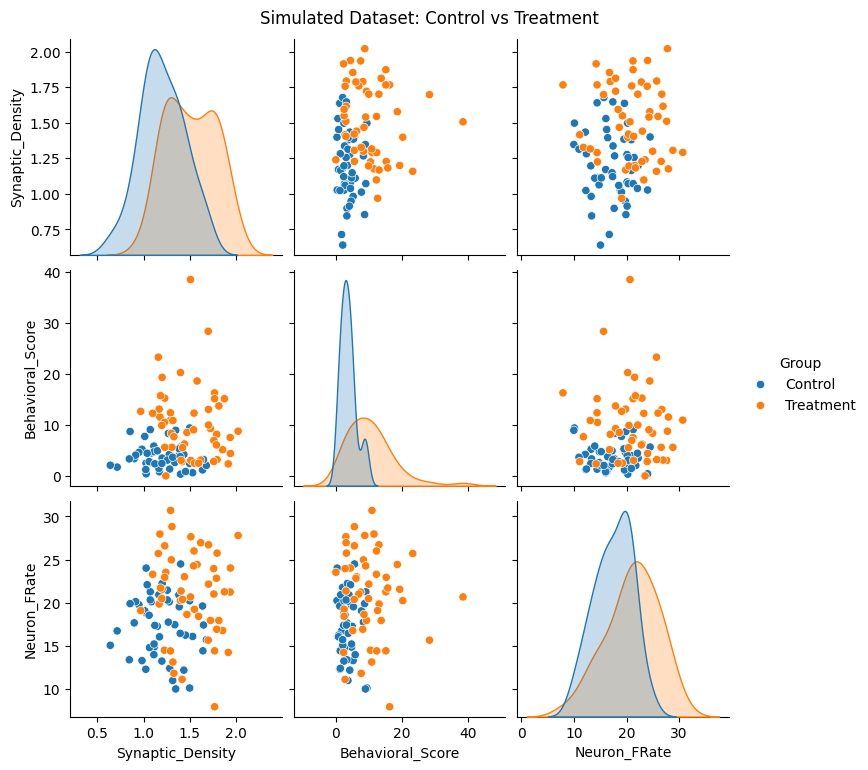

Synaptic_Density: Control p=0.7741, Treatment p=0.0773
Behavioral_Score: Control p=0.0016, Treatment p=0.0002
Neuron_FRate: Control p=0.3109, Treatment p=0.5736


In [ ]:
# solution

np.random.seed(123)  # for reproducibility
n_per_group = 50

# --- Create groups ---
groups = ['Control'] * n_per_group + ['Treatment'] * n_per_group

# --- Synaptic Density (normal, different means) ---
syn_density_control = np.random.normal(1.2, 0.2, n_per_group)
syn_density_treat   = np.random.normal(1.5, 0.25, n_per_group)

# --- Behavioral Score (non-normal, different variance) ---
# We'll use a Gamma distribution for skewness
beh_score_control = np.random.gamma(shape=2, scale=2, size=n_per_group)   # mean ~4, low variance
beh_score_treat   = np.random.gamma(shape=2, scale=6, size=n_per_group)   # mean ~12, higher variance

# --- Neuron firing rate (approximately normal) ---
frate_control = np.random.normal(18, 4, n_per_group)
frate_treat   = np.random.normal(22, 5, n_per_group)

# --- Combine into one DataFrame ---
df = pd.DataFrame({
    'Group': groups,
    'Synaptic_Density': np.concatenate([syn_density_control, syn_density_treat]),
    'Behavioral_Score': np.concatenate([beh_score_control, beh_score_treat]),
    'Neuron_FRate': np.concatenate([frate_control, frate_treat])
})

# Display first few rows
print(df.head())

# --- Quick visual check ---
sns.pairplot(df, hue='Group', diag_kind='kde')
plt.suptitle("Simulated Dataset: Control vs Treatment", y=1.02)
plt.show()

# --- Quick normality checks (Shapiro) ---
for col in ['Synaptic_Density', 'Behavioral_Score', 'Neuron_FRate']:
    stat_c, p_c = stats.shapiro(df[df['Group'] == 'Control'][col])
    stat_t, p_t = stats.shapiro(df[df['Group'] == 'Treatment'][col])
    print(f"{col}: Control p={p_c:.4f}, Treatment p={p_t:.4f}")


In [ ]:
if not df.empty:
    stats_results = [compare_groups(df, metric, group_col='Group') for metric in df.keys()[1:]]
    stats_df = pd.DataFrame(stats_results)
    print("\n--- Statistical Comparison Results (WT vs. KO) ---")
    print(stats_df.to_string())


--- Statistical Comparison Results (WT vs. KO) ---
             Metric           Test Used Statistic P-value  Significant Mean_Control Median_Control Std_Control  N_Control Mean_Treatment Median_Treatment Std_Treatment  N_Treatment Shapiro_p (G1) Shapiro_p (G2) Levene_p
0  Synaptic_Density  Independent T-test    -6.036  0.0000         True         1.20           1.18        0.24         50           1.51             1.51          0.27           50          0.774          0.077    0.170
1  Behavioral_Score      Mann-Whitney U   418.000  0.0000         True         3.73           3.33        2.36         50          10.40             9.22          7.20           50          0.002          0.000    0.000
2      Neuron_FRate  Independent T-test    -4.074  0.0001         True        17.47          17.54        3.59         50          21.03            21.30          5.03           50          0.311          0.574    0.060


**(c)** What are limitations of a fully automated decision function like `compare_groups`?

Consider scenarios where the Shapiro-Wilk p-value is close to the 0.05 threshold (e.g., 0.049 or 0.051).

What role does researcher judgment play in such cases? How to get the input from the researcher for marginal cases?

In [ ]:
# solution

Bonus: How would you adapt your analysis for this three-group design?

In [ ]:
# solution
def analyze_groups_multi(df, metric_col, group_col='Group'):
    """
    Performs statistical analysis for 2 or more groups, following the decision tree.
    - For 2 groups: t-test, Welch's t-test, or Mann-Whitney U.
    - For 3+ groups: ANOVA or Kruskal-Wallis, followed by appropriate post-hoc tests.
    """
    groups = df[group_col].unique()
    num_groups = len(groups)

    # --- Case 1: n = 2 groups (re-use the original logic for simplicity) ---
    if num_groups == 2:
        # We can call the original function if it's available, or just embed the logic
        print(f"--- Analysis for {metric_col} (n=2 groups) ---")
        return compare_groups(df, metric_col, group_col)

    # --- Case 2: n >= 3 groups ---
    elif num_groups > 2:
        print(f"--- Analysis for {metric_col} (n={num_groups} groups) ---")

        # Extract data for all groups
        grouped_data = [df[df[group_col] == g][metric_col].dropna() for g in groups]

        # --- Assumption Check 1: Normality ---
        # Check normality for each group. If any one of them is not normal, we'll use a non-parametric test.
        shapiro_ps = [stats.shapiro(g_data)[1] for g_data in grouped_data if len(g_data) >= 3]
        is_all_normal = all(p > 0.05 for p in shapiro_ps)

        # --- Assumption Check 2: Homogeneity of Variances ---
        levene_stat, levene_p = stats.levene(*grouped_data)
        is_equal_variance = levene_p > 0.05

        omnibus_results = {}
        posthoc_results = None

        # --- Parametric Path (ANOVA) ---
        if is_all_normal and is_equal_variance:
            test_name = "One-Way ANOVA"
            stat, p_val = stats.f_oneway(*grouped_data)
            omnibus_results = {
                'Metric': metric_col, 'Test Used': test_name,
                'Statistic (F)': f"{stat:.3f}", 'P-value': f"{p_val:.4f}",
                'Assumptions': 'Normal (all groups) & Equal Variance'
            }
            # Perform Tukey's HSD post-hoc test if omnibus is significant
            if p_val < 0.05:
                posthoc_results = sp.posthoc_tukey(df, val_col=metric_col, group_col=group_col)
                print("Omnibus test was significant. Performing Tukey's HSD post-hoc test...")

        # --- Non-Parametric Path (Kruskal-Wallis) ---
        else:
            test_name = "Kruskal-Wallis"
            stat, p_val = stats.kruskal(*grouped_data)
            assumption_reason = "At least one group not normal" if not is_all_normal else "Unequal variances"
            omnibus_results = {
                'Metric': metric_col, 'Test Used': test_name,
                'Statistic (H)': f"{stat:.3f}", 'P-value': f"{p_val:.4f}",
                'Assumptions': f'Violated ({assumption_reason})'
            }
            # Perform Dunn's post-hoc test if omnibus is significant
            if p_val < 0.05:
                posthoc_results = sp.posthoc_dunn(df, val_col=metric_col, group_col=group_col, p_adjust='holm')
                print("Omnibus test was significant. Performing Dunn's post-hoc test...")

        return omnibus_results, posthoc_results

    else:
        raise ValueError("Cannot perform analysis with fewer than 2 groups.")

In [ ]:
np.random.seed(123)  # for reproducibility
n_per_group = 50

# --- Create groups ---
groups = ['Control'] * n_per_group + ['Placebo'] * n_per_group +['Treatment'] * n_per_group

# --- Synaptic Density (normal, different means) ---
syn_density_control = np.random.normal(1.2, 0.2, n_per_group)
syn_density_placebo  = np.random.normal(1.35, 0.2, n_per_group)
syn_density_treat   = np.random.normal(1.5, 0.21, n_per_group)

# --- Behavioral Score (non-normal, different variance) ---
# We'll use a Gamma distribution for skewness
beh_score_control = np.random.gamma(shape=2, scale=2, size=n_per_group)
beh_score_placebo = np.random.gamma(shape=2, scale=3, size=n_per_group)
beh_score_treat   = np.random.gamma(shape=2, scale=6, size=n_per_group)

# --- Neuron firing rate (approximately normal) ---
frate_control = np.random.normal(18, 4, n_per_group)
frate_placebo = np.random.normal(19, 5, n_per_group)
frate_treat   = np.random.normal(22, 5, n_per_group)

# --- Combine into one DataFrame ---
df_3groups = pd.DataFrame({
    'Group': groups,
    'Synaptic_Density': np.concatenate([syn_density_control, syn_density_placebo, syn_density_treat]),
    'Behavioral_Score': np.concatenate([beh_score_control,beh_score_placebo, beh_score_treat]),
    'Neuron_FRate': np.concatenate([frate_control, frate_placebo, frate_treat])
})
print("--- Simulated 3-Group Dataset Head ---")
print(df_3groups.head())

--- Simulated 3-Group Dataset Head ---
     Group  Synaptic_Density  Behavioral_Score  Neuron_FRate
0  Control          0.982874          4.032571     17.604961
1  Control          1.399469          4.120886     27.409556
2  Control          1.256596          0.855316     16.215670
3  Control          0.898741          0.456350     17.313638
4  Control          1.084280          4.977637     17.014543


In [ ]:
# --- Analyze the Gaussian Metric ---
syn_omnibus, syn_posthoc = analyze_groups_multi(df_3groups, 'Synaptic_Density', 'Group')
print("\n--- Omnibus Test Results ---")
print(pd.DataFrame([syn_omnibus]).to_string())
if syn_posthoc is not None:
    print("\n--- Post-Hoc Test Results (p-values) ---")
    print(syn_posthoc)
print("\n" + "="*50 + "\n")

--- Analysis for Synaptic_Density (n=3 groups) ---
Omnibus test was significant. Performing Tukey's HSD post-hoc test...

--- Omnibus Test Results ---
             Metric      Test Used Statistic (F) P-value                           Assumptions
0  Synaptic_Density  One-Way ANOVA        26.065  0.0000  Normal (all groups) & Equal Variance

--- Post-Hoc Test Results (p-values) ---
                Control   Placebo     Treatment
Control    1.000000e+00  0.001881  7.805900e-11
Placebo    1.881231e-03  1.000000  7.767565e-04
Treatment  7.805900e-11  0.000777  1.000000e+00




In [ ]:
# --- Analyze the Skewed Metric ---
beh_omnibus, beh_posthoc = analyze_groups_multi(df_3groups, 'Behavioral_Score', 'Group')
print("\n--- Omnibus Test Results ---")
print(pd.DataFrame([beh_omnibus]).to_string())
if beh_posthoc is not None:
    print("\n--- Post-Hoc Test Results (p-values) ---")
    print(beh_posthoc)
print("\n" + "="*50 + "\n")

--- Analysis for Behavioral_Score (n=3 groups) ---
Omnibus test was significant. Performing Dunn's post-hoc test...

--- Omnibus Test Results ---
             Metric       Test Used Statistic (H) P-value                               Assumptions
0  Behavioral_Score  Kruskal-Wallis        63.929  0.0000  Violated (At least one group not normal)

--- Post-Hoc Test Results (p-values) ---
                Control       Placebo     Treatment
Control    1.000000e+00  5.941281e-02  5.091791e-14
Placebo    5.941281e-02  1.000000e+00  1.436697e-08
Treatment  5.091791e-14  1.436697e-08  1.000000e+00




# Problem 3:  ANOVA vs General Linear Model (specifically, a Linear Mixed-Effects Model)  

**Scenario:**

You are analyzing data from a new drug's effect on dendritic spine density in a mouse model of a neurological disorder.

*The experiment design.*

  Fixed Factors (what you are testing):
1. genotype: Wild-Type (WT) vs. Knock-Out (KO)
2. treatment: Vehicle (placebo) vs. Drug
3. sex: Male vs. Female

Nuisance/Grouping Variables (sources of variability to control for):

1. mouse_id: Multiple measurements (e.g., from different brain regions) are taken from the same mouse. These measurements are not independent.

2. cohort: The experiment was run in several batches or "cohorts" over many weeks. There might be slight environmental or procedural differences between cohorts.

Your goal is to determine if the drug works, and if its effect depends on the genotype or sex of the animal, while properly accounting for the data structure.

**(a)**   generate a realistic dataset

with initial parameters and weight of preductors

```
# Define the "true" effects
baseline = 5.0
genotype_effect = -1.0 if genotype == 'KO' else 0
treatment_effect = 0.8 if treatment == 'Drug' else 0
sex_effect = +0.2 if sex == 'Female' else 0
# CRUCIAL INTERACTION: Drug works better in KO mice
interaction_effect = 1.5 if (genotype == 'KO' and treatment == 'Drug') else 0

# Combine all effects + random noise
spine_density = (baseline + genotype_effect + treatment_effect +  interaction_effect + mouse_effect + cohort_effect + np.random.normal(0, 0.5))
```



In [3]:
# Use the following experiment parameters for Data Simulation
np.random.seed(123)
n_mice_per_group = 12
n_measurements_per_mouse = 5
genotypes = ['WT', 'KO']
treatments = ['Vehicle', 'Drug']
sexes = ['Male', 'Female']
cohorts = ['C1', 'C2', 'C3']

data = []
mouse_counter = 0

In [4]:
# solution
np.random.seed(123)
n_mice_per_group = 12
n_measurements_per_mouse = 5
genotypes = ['WT', 'KO']
treatments = ['Vehicle', 'Drug']
sexes = ['Male', 'Female']
cohorts = ['C1', 'C2', 'C3']

data = []
mouse_counter = 0
baseline = 1.14
num_groups = len(genotypes) * len(treatments) * len(sexes)
mice_per_group_per_cohort = n_mice_per_group // len(cohorts)

cohort_effect_map = {c: np.random.normal(0, 0.5) for c in cohorts}
data_rows = []
mouse_counter = 0

for genotype in genotypes:
    for treatment in treatments:
        for sex in sexes:
            for cohort in cohorts:
                cohort_effect = cohort_effect_map[cohort]
                for _ in range(mice_per_group_per_cohort):
                    mouse_counter += 1
                    mouse_effect = np.random.normal(0, 0.5)
                    genotype_effect = -1.0 if genotype == 'KO' else 0.0
                    treatment_effect = 0.8 if treatment == 'Drug' else 0.0
                    sex_effect = 0.2 if sex == 'Female' else 0.0
                    interaction_effect = 1.5 if (genotype == 'KO' and treatment == 'Drug') else 0.0
                    for rep in range(1, n_measurements_per_mouse + 1):
                        noise = np.random.normal(0, 0.5)
                        spine_density = (
                            baseline + genotype_effect + treatment_effect + sex_effect +
                            interaction_effect + mouse_effect + cohort_effect + noise)
                        data_rows.append({
                            'MouseID': mouse_counter, 'Genotype': genotype, 'Treatment': treatment,
                            'Sex': sex, 'Cohort': cohort, 'Measurement': rep, 'SpineDensity': spine_density})

data = pd.DataFrame(data_rows)


**(b)** perform Three-Way ANOVA using OLS

In [5]:
# solution

# Fit the three-way ANOVA model
model = ols('SpineDensity ~ C(Genotype) * C(Treatment) * C(Sex)', data=data).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                                     sum_sq     df           F        PR(>F)
C(Genotype)                        0.301078    1.0    0.471520  4.926262e-01
C(Treatment)                     274.943615    1.0  430.590357  1.900915e-68
C(Sex)                             5.853395    1.0    9.167027  2.599015e-03
C(Genotype):C(Treatment)         115.137767    1.0  180.317743  4.781076e-35
C(Genotype):C(Sex)                 1.203375    1.0    1.884611  1.704629e-01
C(Treatment):C(Sex)                0.673782    1.0    1.055213  3.048357e-01
C(Genotype):C(Treatment):C(Sex)    0.037055    1.0    0.058032  8.097389e-01
Residual                         301.384795  472.0         NaN           NaN


**(c)** perform analysis with a Linear Mixed-Effects Model

In [17]:
# solution
lmm = smf.mixedlm("SpineDensity ~ C(Genotype) * C(Treatment) * C(Sex)",
                            data=data,
                            groups=data['MouseID'],
                            vc_formula={"Cohort": "0 + C(Cohort)"}
                           ).fit(reml=False, method="lbfgs")

print(lmm.summary())

                               Mixed Linear Model Regression Results
Model:                           MixedLM              Dependent Variable:              SpineDensity
No. Observations:                480                  Method:                          ML          
No. Groups:                      96                   Scale:                           0.2420      
Min. group size:                 5                    Log-Likelihood:                  -445.8877   
Max. group size:                 5                    Converged:                       Yes         
Mean group size:                 5.0                                                               
---------------------------------------------------------------------------------------------------
                                                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------------------------
Intercept                      

**(d)** Review summaries of the ANOVA and LME (GLM).
What does the coefficients tell you about how the drug works?

In [18]:
lmm2 = smf.mixedlm("SpineDensity ~ C(Genotype) + C(Treatment) + C(Sex)",
                            data=data,
                            groups=data['MouseID'],
                            vc_formula={"Cohort": "0 + C(Cohort)"}
                           ).fit(reml=False, method="lbfgs")

print(lmm2.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   SpineDensity
No. Observations:     480       Method:               ML          
No. Groups:           96        Scale:                0.2420      
Min. group size:      5         Log-Likelihood:       -467.2789   
Max. group size:      5         Converged:            Yes         
Mean group size:      5.0                                         
------------------------------------------------------------------
                        Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                2.352    0.168 13.989 0.000  2.022  2.681
C(Genotype)[T.WT]        0.050    0.168  0.298 0.766 -0.279  0.380
C(Treatment)[T.Vehicle] -1.514    0.168 -9.005 0.000 -1.843 -1.184
C(Sex)[T.Male]          -0.221    0.168 -1.314 0.189 -0.550  0.109
Cohort Var               0.630    0.222                           



In [19]:
# solution
lmm1 = smf.mixedlm("SpineDensity ~ C(Genotype) + C(Treatment) + C(Sex) + C(Genotype) * C(Treatment)",
                            data=data,
                            groups=data['MouseID'],
                            vc_formula={"Cohort": "0 + C(Cohort)"}
                           ).fit(reml=False, method="lbfgs")

print(lmm1.summary())

                        Mixed Linear Model Regression Results
Model:                     MixedLM          Dependent Variable:          SpineDensity
No. Observations:          480              Method:                      ML          
No. Groups:                96               Scale:                       0.2420      
Min. group size:           5                Log-Likelihood:              -446.3265   
Max. group size:           5                Converged:                   Yes         
Mean group size:           5.0                                                       
-------------------------------------------------------------------------------------
                                          Coef.  Std.Err.    z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------------------
Intercept                                  2.841    0.151  18.806 0.000  2.545  3.137
C(Genotype)[T.WT]                         -0.929    0.191  -4.863 0.000 -1.304

In [38]:
# --- Create a summary table for AIC and BIC ---
model_comparison = pd.DataFrame({
    'Model': ['lmm', 'lmm1', 'lmm2'],
    'AIC': [lmm.aic, lmm1.aic, lmm2.aic],
    'BIC': [lmm.bic, lmm1.bic, lmm2.bic],
    'Log-Likelihood': [lmm.llf, lmm1.llf, lmm2.llf],
    '# Parameters': [lmm.params.shape[0], lmm1.params.shape[0], lmm2.params.shape[0]]
})

print("--- Model Comparison using Information Criteria ---")
print(model_comparison.sort_values(by='AIC'))

--- Model Comparison using Information Criteria ---
  Model         AIC         BIC  Log-Likelihood  # Parameters
1  lmm1  906.652928  935.869431     -446.326464             6
0   lmm  911.775423  953.513284     -445.887712             9
2  lmm2  946.557812  971.600529     -467.278906             5


In [39]:
# Perform the Likelihood Ratio Test between the full model (lmm) and the model without interactions (lmm2)
from scipy.stats import chi2


# Identify which model is which
complex_model = lmm
simple_model = lmm1

# Ensure the log-likelihood of the complex model is indeed higher
assert complex_model.llf >= simple_model.llf, "The complex model must have a higher or equal log-likelihood."

# The formula is always -2 * (logLik_simple - logLik_complex)
lrt_statistic = -2 * (simple_model.llf - complex_model.llf)

# The df difference is always (df_complex - df_simple)
df_diff = complex_model.df_modelwc - simple_model.df_modelwc

# Ensure the degrees of freedom are positive
assert df_diff > 0, "The complex model must have more parameters than the simple model."

p_value = chi2.sf(lrt_statistic, df_diff)

print(f"LRT Statistic: {lrt_statistic:.4f}")
print(f"Degrees of Freedom: {df_diff}")
print(f"P-value: {p_value:.10f}")

LRT Statistic: 0.8775
Degrees of Freedom: 3
P-value: 0.8308527629


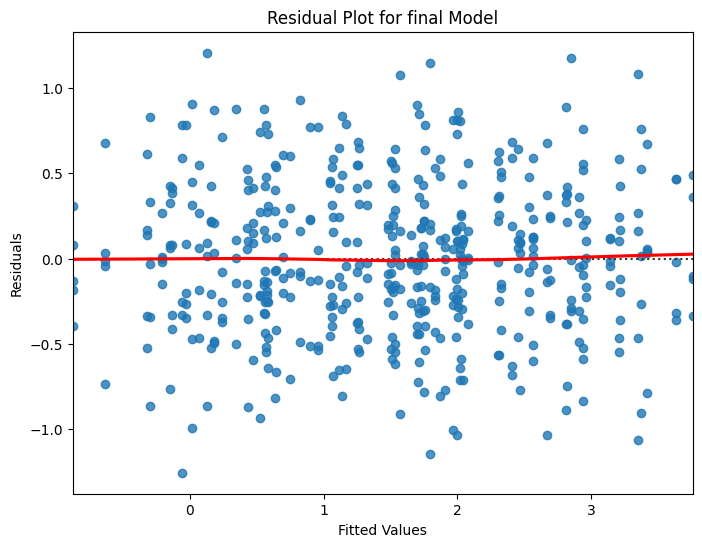

In [40]:
# Plot residuals for the full model
plt.figure(figsize=(8, 6))
sns.residplot(x=lmm1.fittedvalues, y=lmm1.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for final Model")
plt.show()

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           SpineDensity   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     89.08
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           3.22e-82
Time:                        10:40:21   Log-Likelihood:                -569.39
No. Observations:                 480   AIC:                             1155.
Df Residuals:                     472   BIC:                             1188.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

# The model complexity-error curve

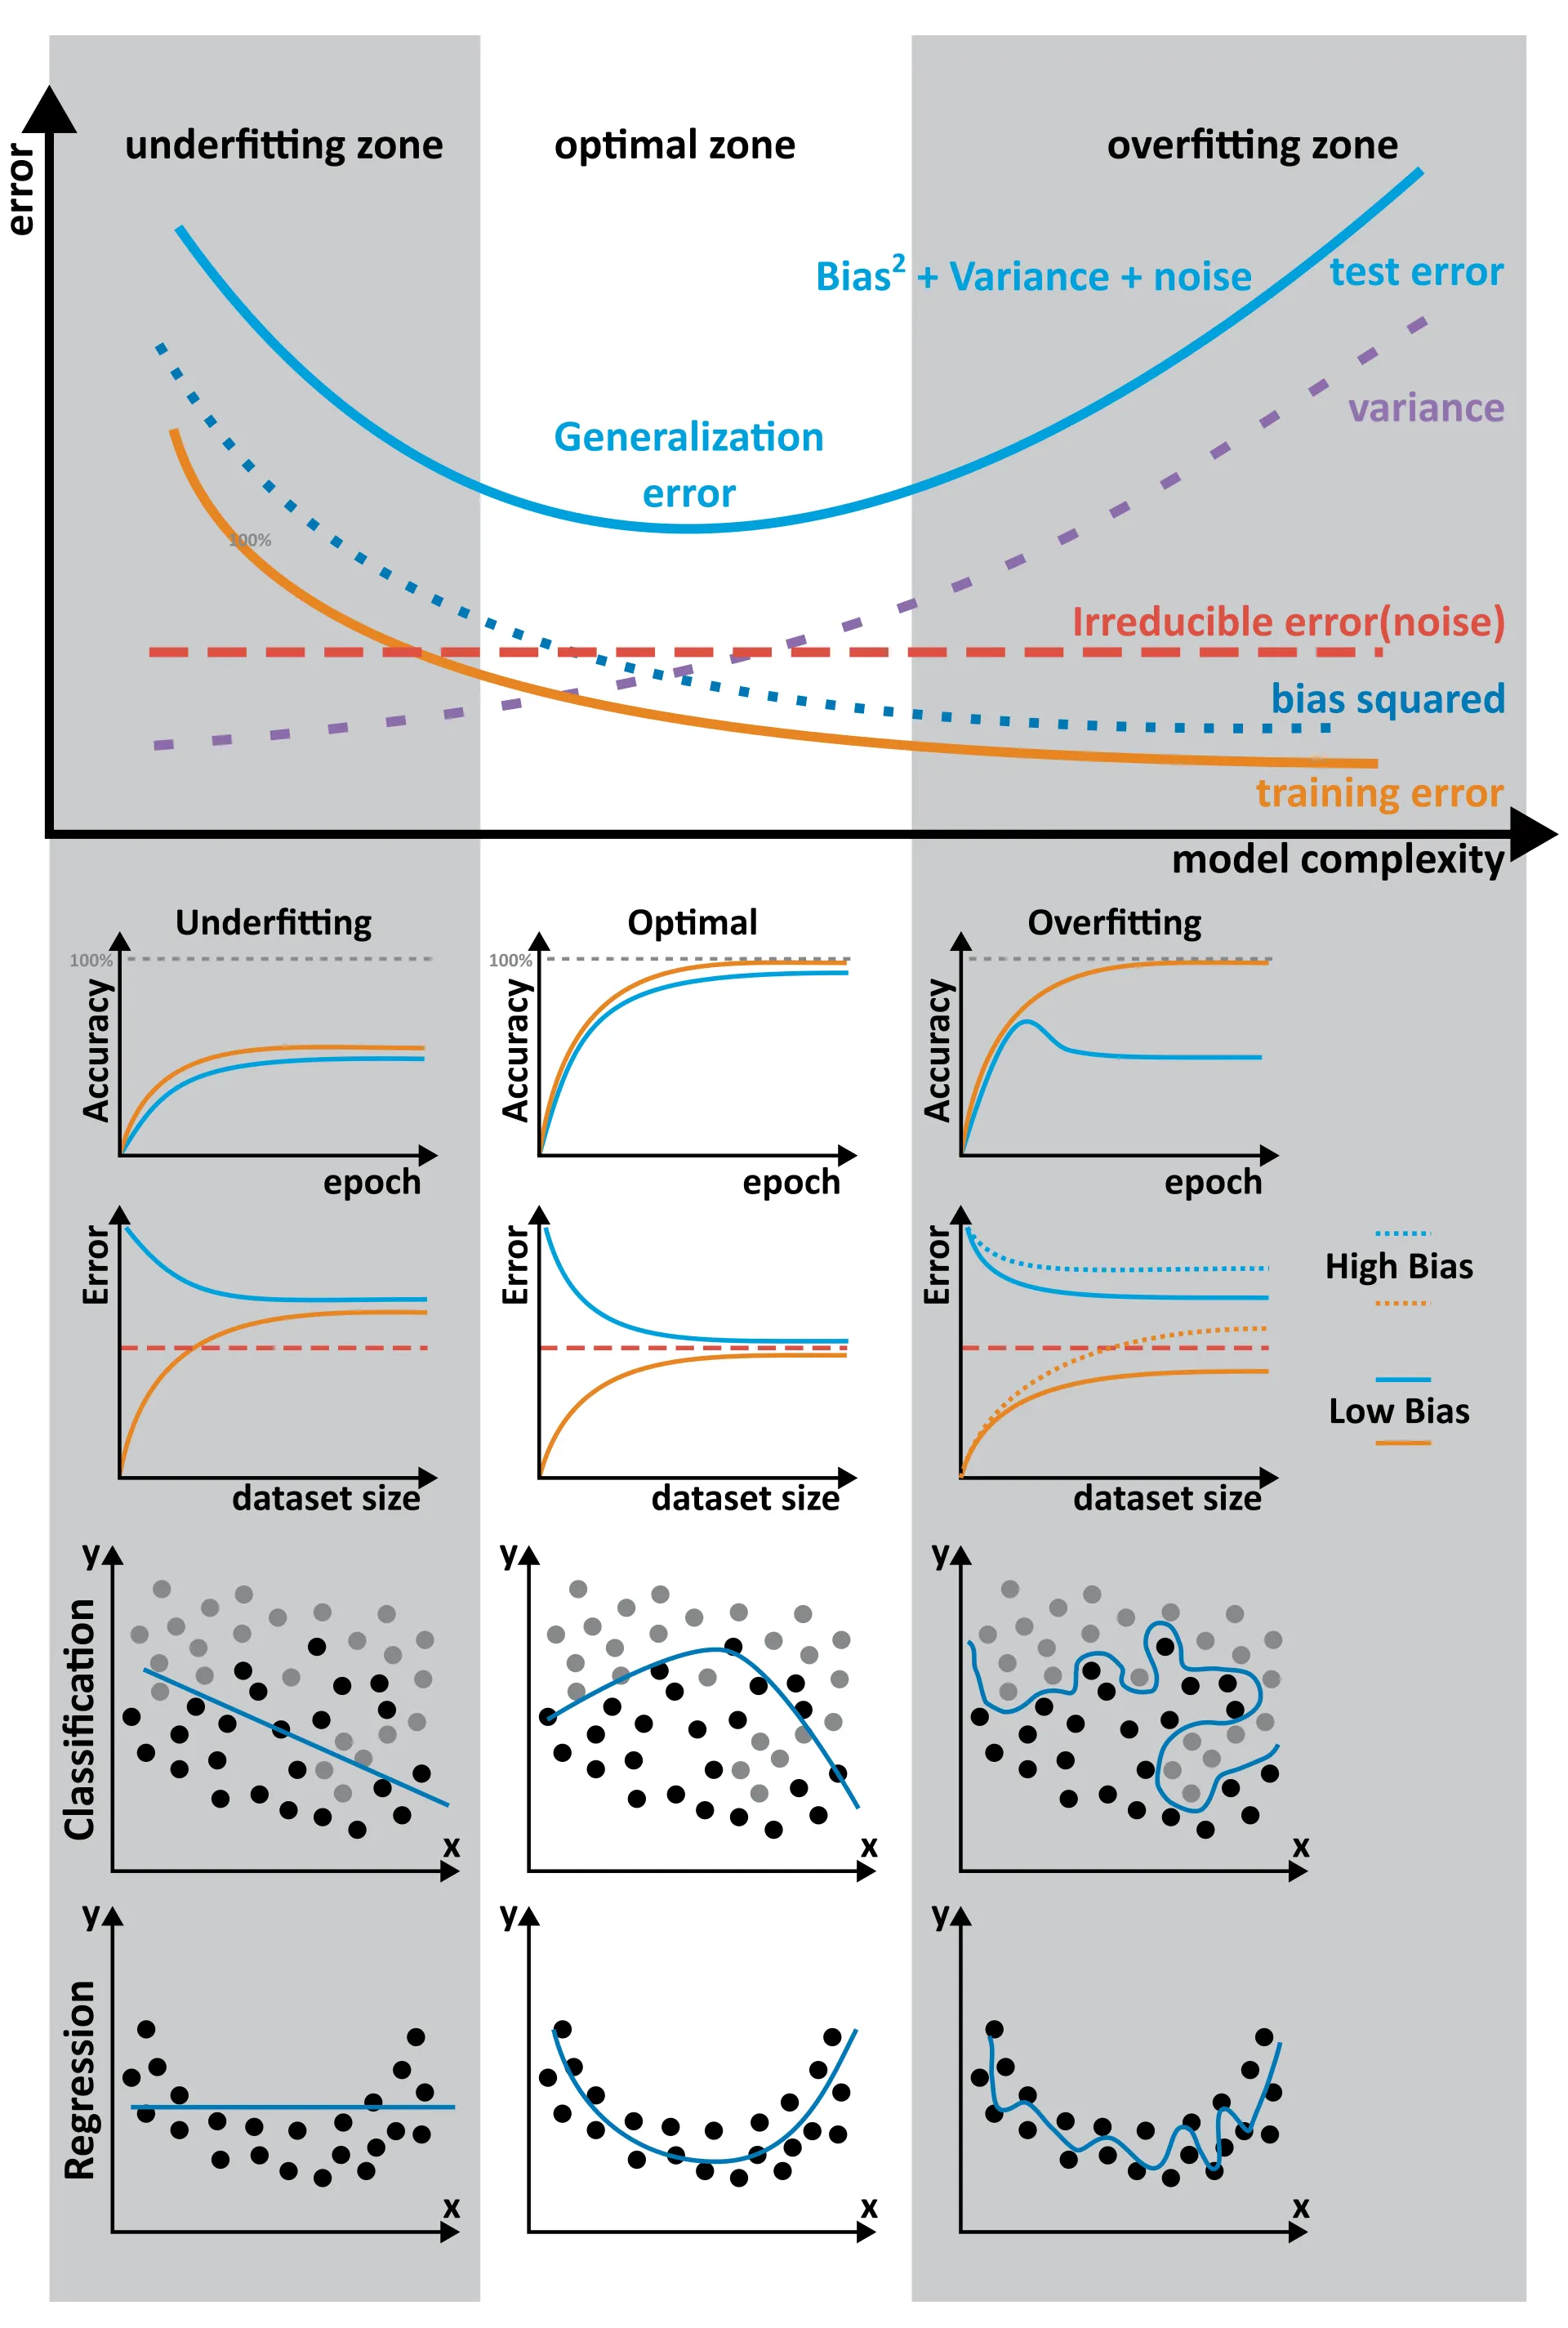